<a href="https://colab.research.google.com/github/jesusrdzvl/Proyecto_IntArt_2022_1/blob/main/01_Exploraci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploración del Dataset**

In [ ]:
# Obtencion de los archivos en formato Zip desde repositorio Github
 !wget https://github.com/davidlon13/Archivos_Proyecto/blob/main/Archivos_proyecto.zip?raw=true

--2022-08-20 22:11:02--  https://github.com/davidlon13/Archivos_Proyecto/blob/main/Archivos_proyecto.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/davidlon13/Archivos_Proyecto/raw/main/Archivos_proyecto.zip [following]
--2022-08-20 22:11:02--  https://github.com/davidlon13/Archivos_Proyecto/raw/main/Archivos_proyecto.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/davidlon13/Archivos_Proyecto/main/Archivos_proyecto.zip [following]
--2022-08-20 22:11:02--  https://raw.githubusercontent.com/davidlon13/Archivos_Proyecto/main/Archivos_proyecto.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

In [ ]:
 # Se descomprimen los archivos
 !unzip /content/Archivos_proyecto.zip?raw=true

Archive:  /content/Archivos_proyecto.zip?raw=true
  inflating: sample_submission.csv   
  inflating: train.csv               
  inflating: train_data_dict.csv     
  inflating: test.csv                


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Se carga la base de datos
dtr = pd.read_csv("train.csv",index_col=0)
dts = pd.read_csv("test.csv",index_col=0) #Dataset adicional para prueba
dtr.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [ ]:
# Variables
dtr.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [ ]:
dts.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit'],
      dtype='object')

In [ ]:
# Tamaño del dataset
print (dtr.shape)
print (dts.shape) #Dataset adicional para prueba

(318438, 17)
(137057, 16)


In [ ]:
# Tipo de datos en el dataset
for c in dtr.columns:
    print ("%20s"%c, dtr[c].dtype)

       Hospital_code int64
  Hospital_type_code object
  City_Code_Hospital int64
Hospital_region_code object
Available Extra Rooms in Hospital int64
          Department object
           Ward_Type object
  Ward_Facility_Code object
           Bed Grade float64
           patientid int64
   City_Code_Patient float64
   Type of Admission object
 Severity of Illness object
Visitors with Patient int64
                 Age object
   Admission_Deposit float64
                Stay object


In [ ]:
#Variables categóricas
ccols = [i for i in dtr.columns if not i in dtr._get_numeric_data()]
for c in ccols:
    print ("%10s"%c, np.unique(dtr[c].dropna()))

Hospital_type_code ['a' 'b' 'c' 'd' 'e' 'f' 'g']
Hospital_region_code ['X' 'Y' 'Z']
Department ['TB & Chest disease' 'anesthesia' 'gynecology' 'radiotherapy' 'surgery']
 Ward_Type ['P' 'Q' 'R' 'S' 'T' 'U']
Ward_Facility_Code ['A' 'B' 'C' 'D' 'E' 'F']
Type of Admission ['Emergency' 'Trauma' 'Urgent']
Severity of Illness ['Extreme' 'Minor' 'Moderate']
       Age ['0-10' '11-20' '21-30' '31-40' '41-50' '51-60' '61-70' '71-80' '81-90'
 '91-100']
      Stay ['0-10' '11-20' '21-30' '31-40' '41-50' '51-60' '61-70' '71-80' '81-90'
 '91-100' 'More than 100 Days']


In [ ]:
# Datos nulos presentes en el dataset de entrenamiento
k = dtr.isna().sum()
k[k!=0]

Bed Grade             113
City_Code_Patient    4532
dtype: int64

In [ ]:
# Datos nulos presentes en el dataset de prueba adicional
k = dts.isna().sum()
k[k!=0]

Bed Grade              35
City_Code_Patient    2157
dtype: int64

In [ ]:
#Se eliminan columnas del Dataset
dtr=dtr.drop('Hospital_region_code',axis=1)
dtr=dtr.drop('Hospital_type_code',axis=1)
dtr=dtr.drop('Ward_Facility_Code',axis=1)
dtr.head(10)

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,
1,8,3,3,radiotherapy,R,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
2,2,5,2,radiotherapy,S,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
3,10,1,2,anesthesia,S,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
4,26,2,2,radiotherapy,R,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
5,26,2,2,radiotherapy,S,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
6,23,6,2,anesthesia,S,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
7,32,9,1,radiotherapy,S,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
8,23,6,4,radiotherapy,Q,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
9,1,10,2,gynecology,R,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60


In [ ]:
#Eliminar datos nulos
dtr=dtr[~dtr.isna().any(axis=1)]

In [ ]:
Department=pd.factorize(dtr['Department'])[0]
Ward_Type=pd.factorize(dtr['Ward_Type'])[0]
Type_Admission=pd.factorize(dtr['Type of Admission'])[0]
Severity=pd.factorize(dtr['Severity of Illness'])[0]
Age=pd.factorize(dtr['Age'])[0]
Stay=pd.factorize(dtr['Stay'])[0]

In [ ]:
dtr['Department']=Department
dtr['Ward_Type']=Ward_Type
dtr['Type of Admission']=Type_Admission
dtr['Severity of Illness']=Severity
dtr['Age']=Age
dtr['Stay']=Stay

In [ ]:
dtr

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,
1,8,3,3,0,0,2.0,31397,7.0,0,0,2,0,4911.0,0
2,2,5,2,0,1,2.0,31397,7.0,1,0,2,0,5954.0,1
3,10,1,2,1,1,2.0,31397,7.0,1,0,2,0,4745.0,2
4,26,2,2,0,0,2.0,31397,7.0,1,0,2,0,7272.0,1
5,26,2,2,0,1,2.0,31397,7.0,1,0,2,0,5558.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,6,6,3,0,2,4.0,86499,23.0,0,1,3,3,4144.0,3
318435,24,1,2,1,2,4.0,325,8.0,2,1,4,4,6699.0,2
318436,7,4,3,2,0,4.0,125235,10.0,0,2,3,1,4235.0,3


In [ ]:
# Tipo de datos en el dataset
for c in dtr.columns:
    print ("%20s"%c, dtr[c].dtype)

       Hospital_code int64
  City_Code_Hospital int64
Available Extra Rooms in Hospital int64
          Department int64
           Ward_Type int64
           Bed Grade float64
           patientid int64
   City_Code_Patient float64
   Type of Admission int64
 Severity of Illness int64
Visitors with Patient int64
                 Age int64
   Admission_Deposit float64
                Stay int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


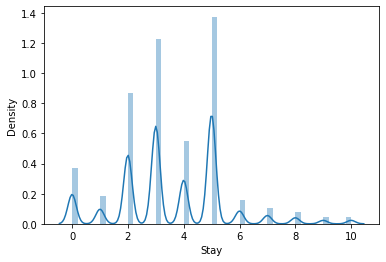

In [ ]:
#Distribución de la variable objetivo
sns.distplot(dtr['Stay']);

In [ ]:
#Variables numéricas
dtr._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
Hospital_code,318438.0,18.318841,8.633755,1.0,11.0,19.0,26.0,32.0
City_Code_Hospital,318438.0,4.771717,3.102535,1.0,2.0,5.0,7.0,13.0
Available Extra Rooms in Hospital,318438.0,3.197627,1.168171,0.0,2.0,3.0,4.0,24.0
Bed Grade,318325.0,2.625807,0.873146,1.0,2.0,3.0,3.0,4.0
patientid,318438.0,65747.579472,37979.936440,1.0,32847.0,65724.5,98470.0,131624.0
City_Code_Patient,313906.0,7.251859,4.745266,1.0,4.0,8.0,8.0,38.0
Visitors with Patient,318438.0,3.284099,1.764061,0.0,2.0,3.0,4.0,32.0
Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.0,4741.0,5409.0,11008.0


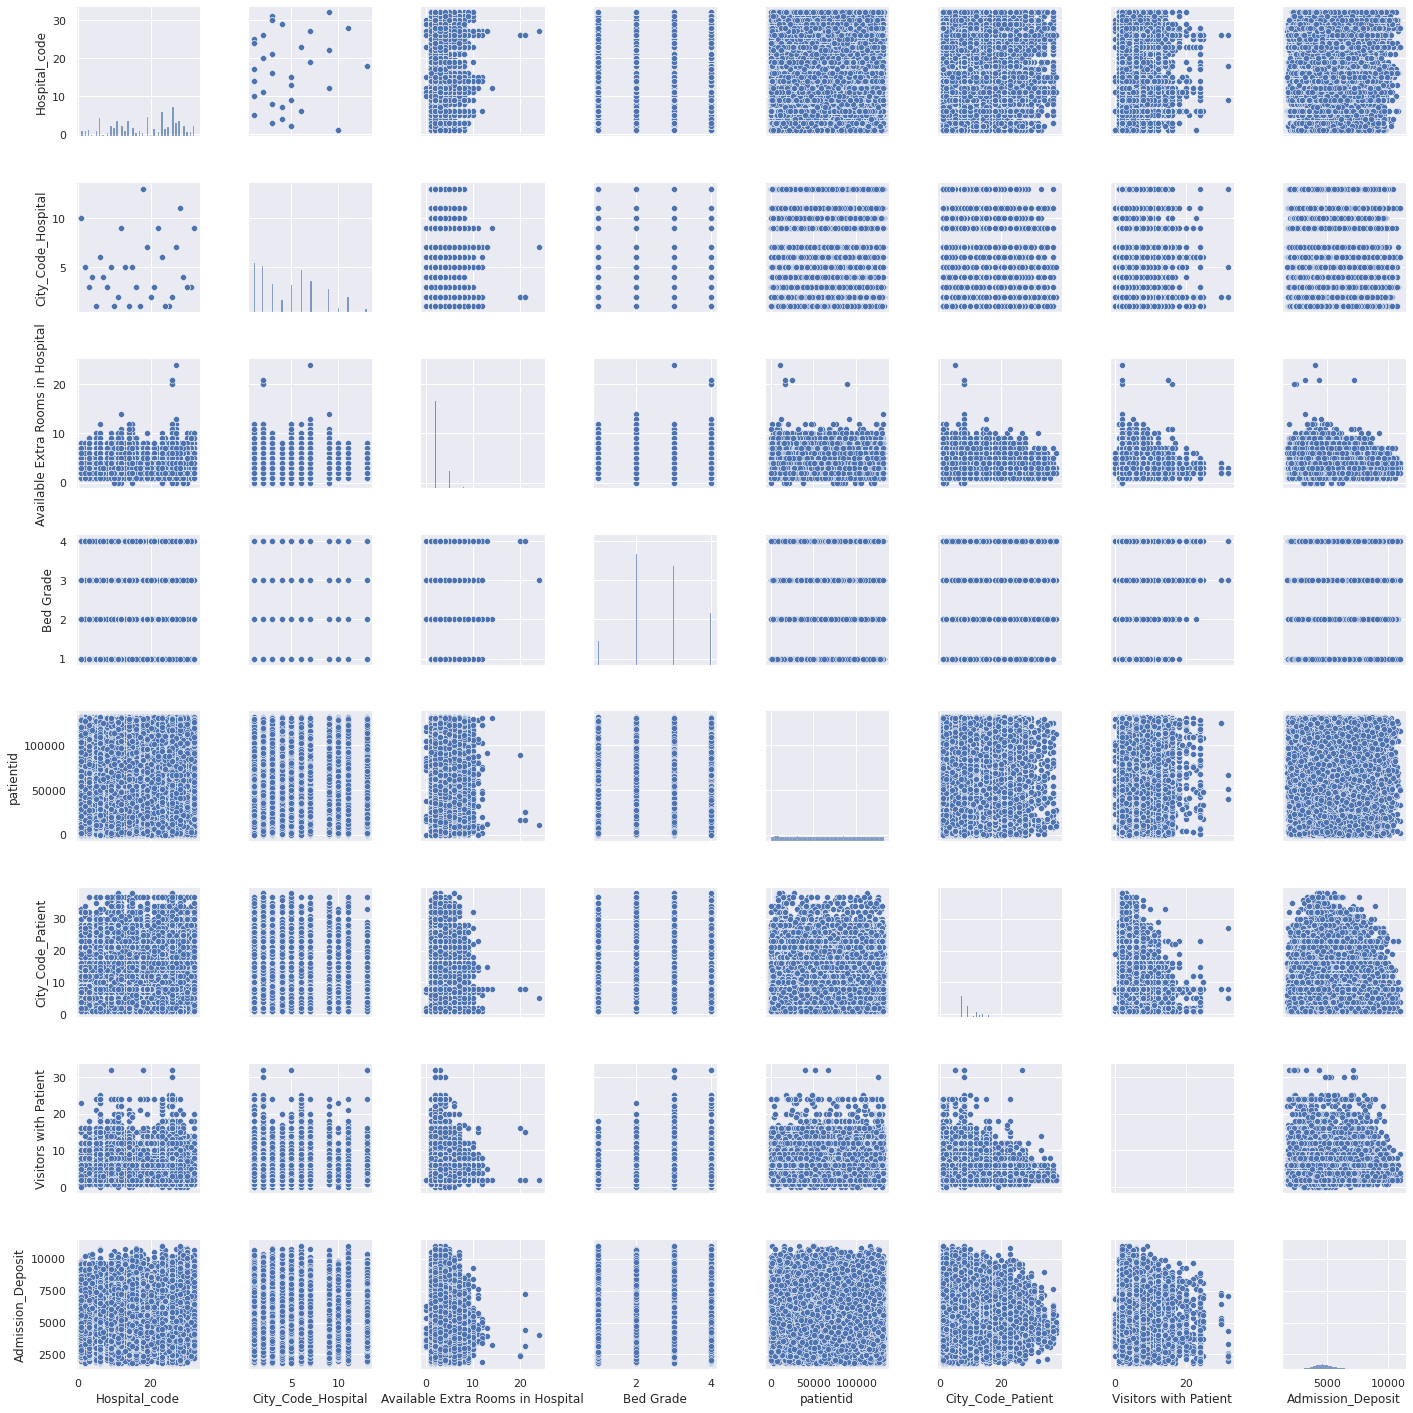

In [ ]:
cols = ['Hospital_code',  'City_Code_Hospital','Available Extra Rooms in Hospital',
       'Department', 'Ward_Type',  'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay']
sns.set()
sns.pairplot(dtr[cols])

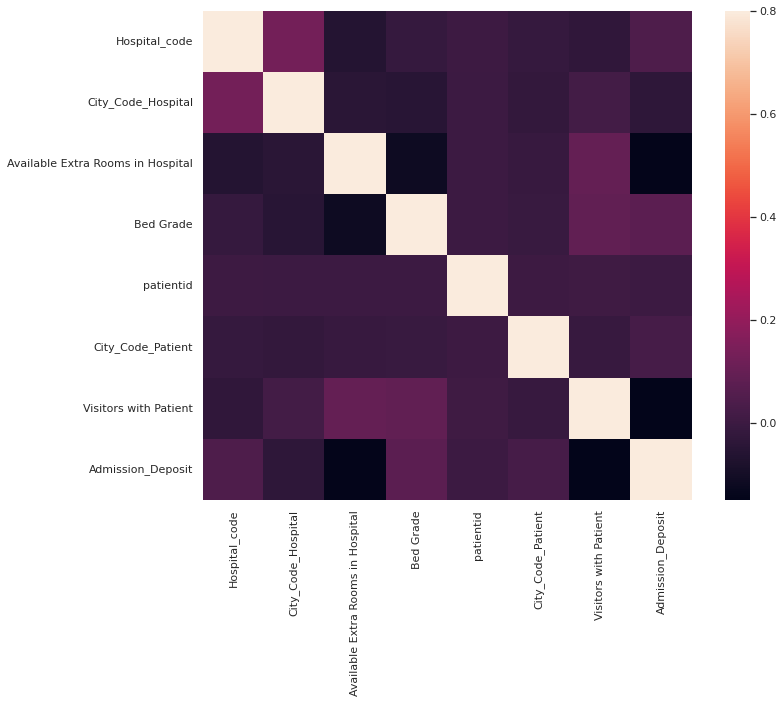

In [ ]:
#Matriz de correlación
corrmat = dtr.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);